## Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
import scipy as sp
from statsmodels.graphics.gofplots import qqplot
from itertools import cycle, islice

## Datos

In [2]:
df = pd.read_csv("data.csv")
df

,dates,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,Antigua and Barbuda,...,Least Developed Countries,Land Locked Developing Countries,Small Island Developing States,Low Income Food Deficit Countries,Net Food Importing Developing Countries,Annex I countries,Non-Annex I countries,OECD,Year,Month
0,1961-01-31,0.777,0.180,-1.022,0.565,-0.518,0.209,0.617,-1.807,0.656,...,0.349,0.169,-0.034,0.350,0.266,0.808,0.108,0.437,1961,1
1,1961-02-28,-1.743,-0.625,0.196,0.261,3.383,-0.545,0.382,-0.471,0.410,...,-0.897,-0.730,0.195,-1.058,-0.594,1.155,-0.384,0.756,1961,2
2,1961-03-31,0.516,0.995,-1.051,-0.831,1.559,0.170,0.004,-2.035,-0.265,...,-0.333,-0.526,0.137,-0.224,-0.200,0.826,-0.163,0.205,1961,3
3,1961-04-30,-1.709,2.412,1.720,0.068,2.486,0.116,0.276,-1.477,0.000,...,0.085,0.460,0.132,0.035,0.244,0.327,0.238,-0.029,1961,4
4,1961-05-31,1.412,-0.515,1.863,0.133,0.545,0.786,0.218,0.497,0.116,...,0.631,0.525,-0.006,0.528,0.508,0.318,0.397,-0.290,1961,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,2019-08-31,0.773,3.336,2.388,1.879,2.844,1.795,0.878,-0.134,1.049,...,1.417,1.090,1.095,1.234,1.418,1.033,1.322,1.034,2019,8
704,2019-09-30,2.004,2.706,2.192,1.658,1.951,0.534,1.034,-0.044,1.229,...,1.277,1.182,0.926,1.277,1.484,1.268,1.523,1.542,2019,9
705,2019-10-31,1.264,3.004,2.076,1.504,2.749,1.230,0.966,0.466,0.859,...,1.230,1.686,0.957,1.019,1.303,1.758,1.388,1.127,2019,10
706,2019-11-30,-1.051,3.585,0.899,1.107,0.618,1.688,1.142,1.653,1.169,...,1.823,1.008,1.007,1.529,1.698,1.177,1.547,1.030,2019,11


In [3]:
df.describe()

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,Antigua and Barbuda,Argentina,...,Least Developed Countries,Land Locked Developing Countries,Small Island Developing States,Low Income Food Deficit Countries,Net Food Importing Developing Countries,Annex I countries,Non-Annex I countries,OECD,Year,Month
count,708.000000,708.000000,708.000000,640.000000,708.000000,708.000000,708.000000,708.000000,676.000000,708.000000,...,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000
mean,0.436037,0.485035,0.716062,0.432105,0.699853,0.414671,0.258685,0.159014,0.262291,0.265787,...,0.472532,0.558938,0.440657,0.437034,0.480583,0.604466,0.468469,0.496814,1990.000000,6.500000
std,1.399904,1.455122,1.217751,0.671782,1.507793,0.649504,0.484786,1.723756,0.502442,0.885742,...,0.551399,0.711948,0.469796,0.536575,0.530160,0.862648,0.516221,0.753621,17.041426,3.454493
min,-7.722000,-4.322000,-2.680000,-2.114000,-4.540000,-1.204000,-1.209000,-5.025000,-1.297000,-2.619000,...,-1.064000,-2.254000,-0.623000,-1.061000,-0.828000,-2.405000,-0.848000,-2.679000,1961.000000,1.000000
25%,-0.327250,-0.452000,-0.185750,-0.015500,-0.217500,-0.052250,-0.096000,-0.974250,-0.096500,-0.267250,...,0.051750,0.087250,0.071000,0.034000,0.088500,0.005750,0.074250,-0.030000,1975.000000,3.750000
50%,0.495500,0.476500,0.717500,0.350000,0.637000,0.343500,0.248000,0.078500,0.281500,0.252500,...,0.471500,0.497000,0.415500,0.434000,0.451000,0.547500,0.400500,0.455500,1990.000000,6.500000
75%,1.258000,1.432250,1.577500,0.875250,1.750000,0.832500,0.592750,1.282750,0.582000,0.831000,...,0.864000,1.041500,0.772500,0.816500,0.893250,1.116000,0.874500,0.975500,2005.000000,9.250000
max,4.725000,4.878000,4.305000,3.557000,5.696000,2.814000,2.153000,6.738000,2.315000,3.153000,...,2.124000,3.303000,1.739000,2.187000,2.037000,4.039000,2.012000,2.720000,2019.000000,12.000000


## Grupos de datos a analizar

In [4]:
interest_groups = df.columns[-10:-2]
continents = ["Africa", "Americas", "Asia", "Europe", "Oceania"]
regions = [name for name in df.columns[250:272] if name not in continents]

In [5]:
interest_groups_df = df[interest_groups]
continents_df = df[continents]
regions_df = df[regions]

## Agrupaciones temporales

In [6]:
interest_groups_df_lapse=interest_groups_df.copy()
continents_df_lapse=continents_df.copy()
regions_df_lapse=regions_df.copy()

dfs=[interest_groups_df_lapse,continents_df_lapse,regions_df_lapse]

In [7]:
def time_group(lapse,n):
    labels=[]
    for i in range(1,int(np.ceil(n/lapse))+1):
        labels.extend(np.ones(lapse).astype(int)*i)
    return labels[0:n]

In [8]:
for each_df in dfs:
    each_df['Trimester']=time_group(3,len(each_df))
    each_df['Semester']=time_group(6,len(each_df))
    each_df['Year']=time_group(12,len(each_df))
    each_df['Lustrum']=time_group(60,len(each_df))
    each_df['Decade']=time_group(120,len(each_df))

## Diccionario de grupos de datos

In [9]:
interest_groups_data={'Month':interest_groups_df}
for time_interval in ['Trimester','Semester','Year','Lustrum','Decade']:
    interest_groups_data[time_interval]=(interest_groups_df_lapse.groupby(time_interval).mean())[interest_groups]
    
continents_data={'Month':continents_df}
for time_interval in ['Trimester','Semester','Year','Lustrum','Decade']:
    continents_data[time_interval]=(continents_df_lapse.groupby(time_interval).mean())[continents]
    
regions_data={'Month':regions_df}
for time_interval in ['Trimester','Semester','Year','Lustrum','Decade']:
    regions_data[time_interval]=(regions_df_lapse.groupby(time_interval).mean())[regions]
    
grouped_data={'Interest Groups':interest_groups_data,
              'Continents':continents_data,
              'Regions':regions_data}

## Análisis Descriptivo

### Análisis base con datos continentales.

In [10]:
def descriptiveAnalysis(data):
    print('\n========== Datos ==========\n')
    print(data)
    
    print('\n========== Medidas básicas ==========\n')
    print(data.describe())
    
    print('\n========== Serie Temporal ==========\n')
    axes = data.plot(figsize=(10, 10), subplots=True)
    plt.show()
    
    print('\n========== Correlación ==========\n')
    plt.figure(figsize=(6,6))
    sns.heatmap(data.corr(),annot=True, cmap="YlGnBu").set_title('Correlación grupal')
    plt.show()
    
    print('\n========== Histogramas ==========\n')
    plt.figure(figsize=(8,8))
    colors=['gray','skyblue','indigo','lightsalmon','olivedrab']
    for column in data.columns:
      plt.subplot(2,3,list(data.columns).index(column)+1).set_title(column)
      plt.hist(data[column],color=colors[list(data.columns).index(column)])
    plt.show()
        
    print('\n========== Normalidad ==========\n')
    
    print('\n • QQPlots \n')
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
    ax= axes.flatten()
    for column in data.columns:
        qqplot(data[column].dropna(), fit = True, line='s', ax=ax[list(data.columns).index(column)],alpha=0.5)
        ax[list(data.columns).index(column)].title.set_text(column)

    fig.delaxes(ax[-1])
    plt.show()
    
    print('\n • Curve fitting \n')
    
    parameters=[]
    hyp_test={}

    plt.figure(figsize=(8,8))

    for column in data.columns:
        params=[data[column].mean(),[data[column].std()]]

        parameters.extend(params)

        stat,test=sp.stats.normaltest(data[column])

        hyp_test[column]=(stat,test)

        plt.subplot(2,3,list(data.columns).index(column)+1).set_title(column)

        size=50

        entries, bin_edges, patches = plt.hist(data[column], bins= size,label='Conteo', color=colors[list(data.columns).index(column)])


        x=np.linspace(min(bin_edges),max(bin_edges),size)

        theoric=[(sp.stats.norm.cdf(x[i+1], loc=params[0], scale=params[1])-sp.stats.norm.cdf(x[i], loc=params[0], scale=params[1]))*len(data[column]) for i in range(len(x)-1)]

        plt.plot(x[0:size-1],theoric,color='r')
        
    plt.show()
    
    print(' • Hypothesis Test \n')
    
    print('(Statistic,pvalue) \n')
    
    for key,values in zip(hyp_test.keys(),hyp_test.values()):
        print(key,values)


========== Datos ==========

     Africa  Americas   Asia  Europe  Oceania
0     0.105     0.339  0.182   1.086    0.235
1    -0.814     0.279 -0.136   1.921   -0.005
2    -0.492    -0.150  0.095   1.863    0.180
3     0.318    -0.303  0.288   0.986    0.578
4     0.684    -0.042  0.064   1.089   -0.160
..      ...       ...    ...     ...      ...
703   1.632     1.019  1.163   1.329    0.458
704   1.411     1.687  1.469   0.964    1.169
705   1.460     0.991  1.623   2.356    1.962
706   1.883     1.275  0.912   1.733    1.191
707   1.371     1.725  1.363   3.075    2.912

[708 rows x 5 columns]

========== Medidas básicas ==========

           Africa    Americas        Asia      Europe     Oceania
count  708.000000  708.000000  708.000000  708.000000  708.000000
mean     0.492147    0.485032    0.474819    0.734213    0.426034
std      0.576287    0.699126    0.716249    1.324875    0.714232
min     -1.202000   -2.296000   -2.011000   -4.030000   -1.343000
25%      0.065000   -0.0

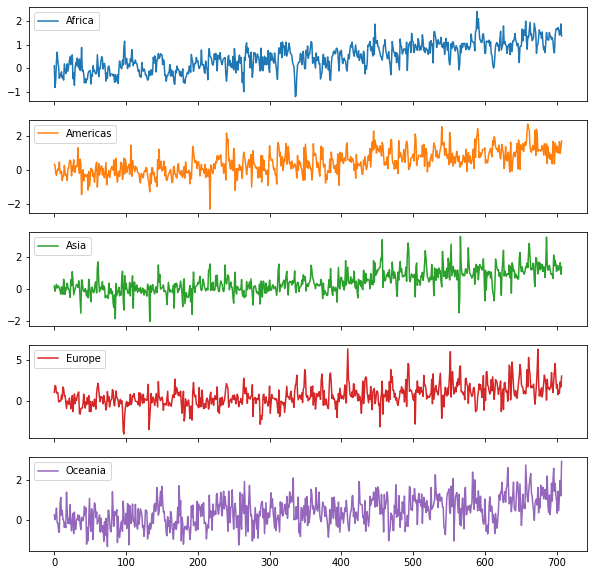


========== Correlación ==========



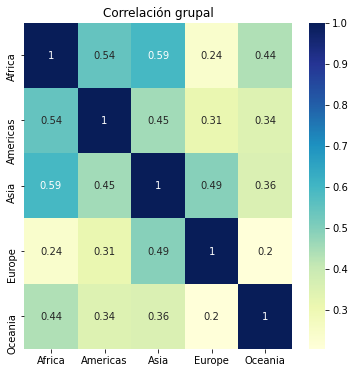


========== Histogramas ==========



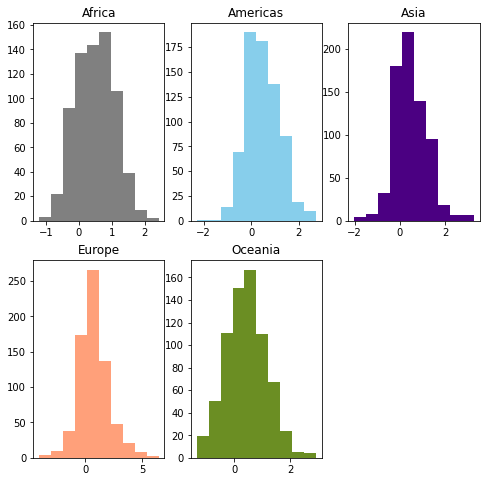


========== Normalidad ==========


 • QQPlots 



C:\Users\herna\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\herna\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\herna\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\herna\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\g

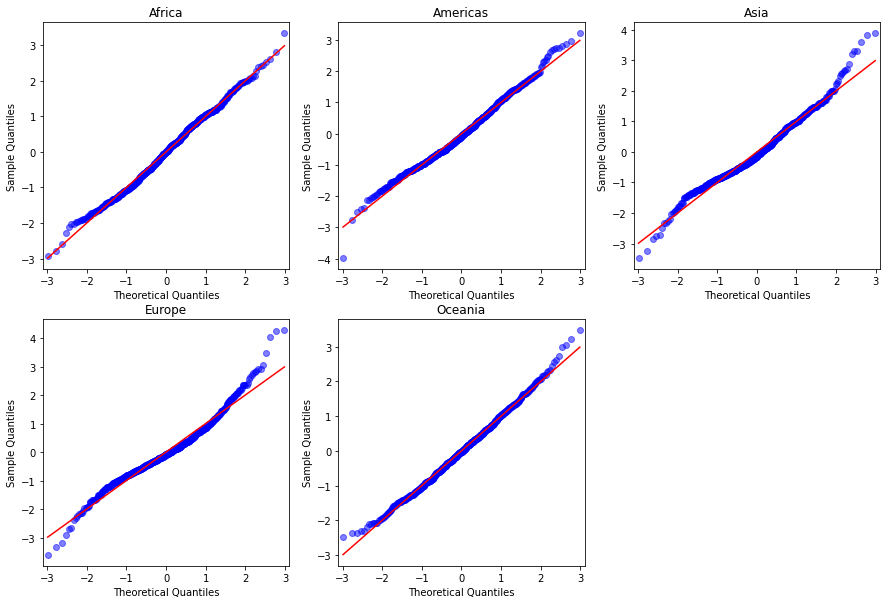


 • Curve fitting 



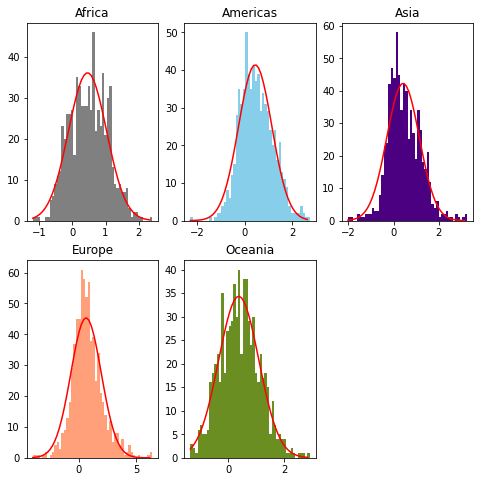

 • Hypothesis Test 

(Statistic,pvalue) 

Africa (6.113184603373596, 0.0470477468889186)
Americas (7.710959865040161, 0.02116344384744399)
Asia (34.802413361075025, 2.7717366228586783e-08)
Europe (63.452670691135765, 1.6650513375971643e-14)
Oceania (5.603917818348325, 0.06069105783350417)


In [11]:
descriptiveAnalysis(data=grouped_data['Continents']['Month'])


========== Datos ==========

             Africa  Americas      Asia    Europe   Oceania
Trimester                                                  
1         -0.400333  0.156000  0.047000  1.623333  0.136667
2          0.427333 -0.086667  0.167000  1.026000  0.084333
3         -0.210667  0.107333  0.043000 -0.017333 -0.144000
4         -0.292000 -0.296333 -0.102000  0.345333  0.599333
5         -0.214333 -0.143667  0.162667  1.309333 -0.133667
...             ...       ...       ...       ...       ...
232        1.224333  0.877000  0.830000  2.088000  1.575333
233        0.916667  1.145667  1.771333  3.558667  1.932333
234        1.655333  1.269667  1.356333  2.162333  0.826000
235        1.590333  1.247000  1.285333  1.027000  1.013333
236        1.571333  1.330333  1.299333  2.388000  2.021667

[236 rows x 5 columns]

========== Medidas básicas ==========

           Africa    Americas        Asia      Europe     Oceania
count  236.000000  236.000000  236.000000  236.000000  236.0

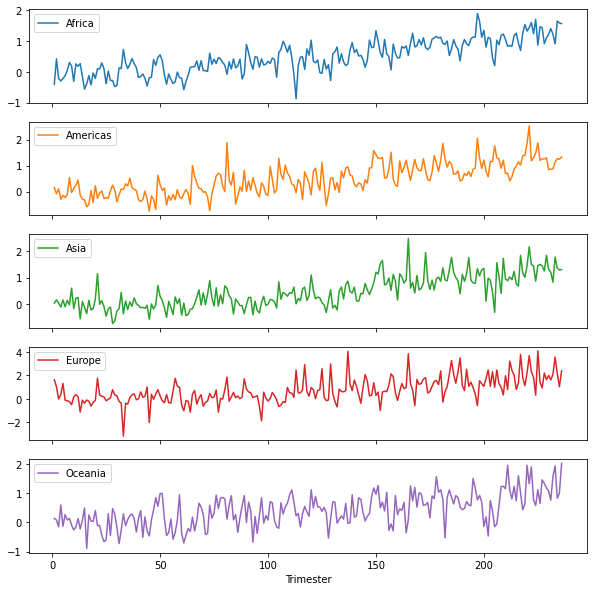


========== Correlación ==========



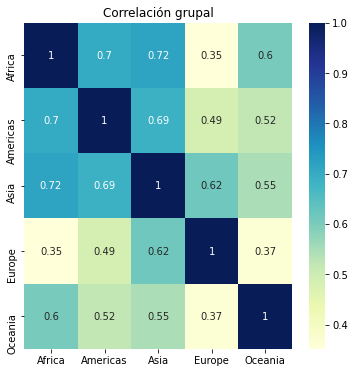


========== Histogramas ==========



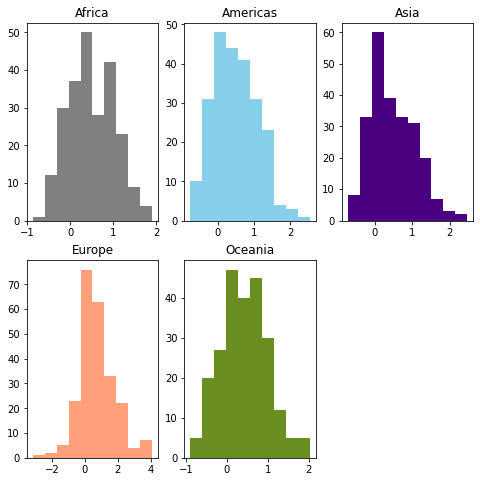


========== Normalidad ==========


 • QQPlots 



C:\Users\herna\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\herna\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\herna\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\herna\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\g

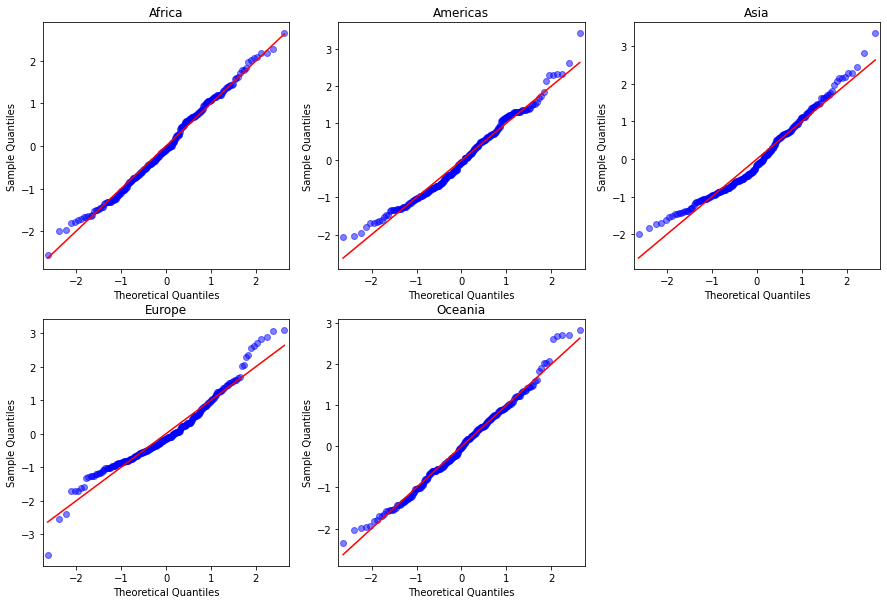


 • Curve fitting 



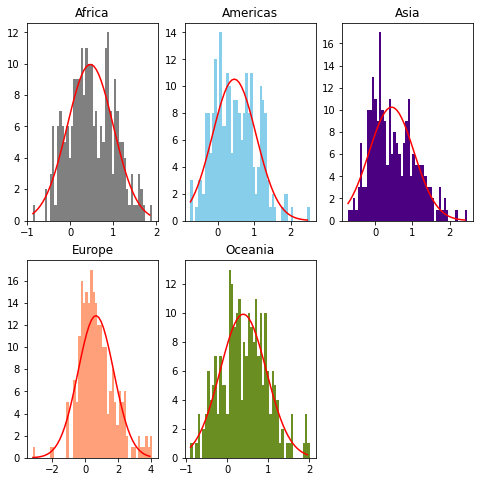

 • Hypothesis Test 

(Statistic,pvalue) 

Africa (6.026224051947487, 0.04913852021616209)
Americas (5.645904036988353, 0.05943024432373336)
Asia (11.514257479478363, 0.0031601722614905507)
Europe (18.417256407238035, 0.00010017136349543084)
Oceania (2.3265077805405063, 0.3124677890150114)


In [12]:
descriptiveAnalysis(data=grouped_data['Continents']['Trimester'])